#         Chi square 
    tells relationship between categorical variables.
    It sorts independent variables (features) in order of importance, of their effect on dependent variable (tgt variable).
    It is a part of feature selection.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\Shobita Tiwari\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/divyanshu132/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv")

In [3]:
churn_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0  1          15634602    Hargrave  619          France    Female  42   2       0.00       1              1          1               101348.88        1     
1  2          15647311    Hill      608          Spain     Female  41   1       83807.86   1              0          1               112542.58        0     
2  3          15619304    Onio      502          France    Female  42   8       159660.80  3              1          0               113931.57        1     
3  4          15701354    Boni      699          France    Female  39   1       0.00       2              0          0               93826.63         0     
4  5          15737888    Mitchell  850          Spain     Female  43   2       125510.82  1              1          1               79084.10         0

In [4]:
churn_df.shape

(10000, 14)

In [5]:
churn_df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure        Balance  NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   10000.00000  10000.000000    10000.000000     10000.000000
mean   5000.50000   1.569094e+07  650.528800    38.921800     5.012800      76485.889288   1.530200       0.70550      0.515100        100090.239881    0.203700    
std    2886.89568   7.193619e+04  96.653299     10.487806     2.892174      62397.405202   0.581654       0.45584      0.499797        57510.492818     0.402769    
min    1.00000      1.556570e+07  350.000000    18.000000     0.000000      0.000000       1.000000       0.00000      0.000000        11.580000        0.000000    
25%    2500.75000   1.562853e+07  584.000000    32.000000     3.000000      0.000000       1.000000       0.00000      0.000000        51002.110000     0.000000    
50%    5000.50000   1.569074e+07  652.000000    37.000000     5.000000      97198.540000   1.000000       1.00000      1.000000        100193.915000    0.000000    
75%    7500.25000   1.575323e+07  718.000000    44.000000     7.000000      127644.240000  2.000000       1.00000      1.000000        149388.247500    0.000000    
max    10000.00000  1.581569e+07  850.000000    92.000000     10.000000     250898.090000  4.000000       1.00000      1.000000        199992.480000    1.000000

In [6]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
le=LabelEncoder()

churn_df['Geography']=le.fit_transform(churn_df['Geography'])
churn_df['Gender']=le.fit_transform(churn_df['Gender'])
churn_df['Surname']=le.fit_transform(churn_df['Surname'])

In [17]:
churn_df.head()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0  1          15634602    1115     619          0          0       42   2       0.00       1              1          1               101348.88        1     
1  2          15647311    1177     608          2          0       41   1       83807.86   1              0          1               112542.58        0     
2  3          15619304    2040     502          0          0       42   8       159660.80  3              1          0               113931.57        1     
3  4          15701354    289      699          0          0       39   1       0.00       2              0          0               93826.63         0     
4  5          15737888    1822     850          2          0       43   2       125510.82  1              1          1               79084.10         0

In [18]:
churn_df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [19]:
X=churn_df.drop('Exited', axis=1)
y=churn_df['Exited']

In [20]:
chi_squares=chi2(X,y)

In [22]:
chi_squares

(array([4.57638152e+03, 1.28730837e+02, 5.56133225e+02, 1.05403468e+02,
        1.18532506e+01, 5.15399263e+01, 2.30041748e+03, 3.27053797e+00,
        7.15130278e+06, 5.05539429e+00, 1.50040970e-01, 1.18199414e+02,
        4.83508818e+04]),
 array([0.00000000e+000, 7.76680092e-030, 5.83146756e-123, 9.96353608e-025,
        5.75607838e-004, 7.01557451e-013, 0.00000000e+000, 7.05344899e-002,
        0.00000000e+000, 2.45493956e-002, 6.98496209e-001, 1.56803624e-027,
        0.00000000e+000]))

In [27]:
p_value=pd.Series(chi_squares[1], index=X.columns)

In [26]:
X.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [31]:
p_value.sort_values(ascending=False, inplace=True)
p_value

HasCrCard          6.984962e-01 
Tenure             7.053449e-02 
NumOfProducts      2.454940e-02 
Geography          5.756078e-04 
Gender             7.015575e-13 
CreditScore        9.963536e-25 
IsActiveMember     1.568036e-27 
CustomerId         7.766801e-30 
Surname            5.831468e-123
EstimatedSalary    0.000000e+00 
Balance            0.000000e+00 
Age                0.000000e+00 
RowNumber          0.000000e+00 
dtype: float64

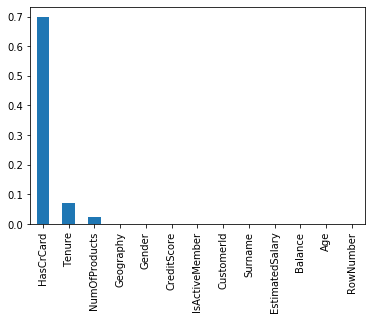

In [32]:
p_value.plot.bar()

Since p-value for 'Has CrCard' is higher than 0.05 (cut off value), thus target variable ('Exited') is independent of this column, and cannot be used for model training.